# Autograding Lessons Learned

So I was able to implement some of what we leaned this semester in a notebook with tests that autogrades and outputs to a csv. I didn’t give them the test code.  
 
 Here is how it worked.  Students got these instructions:
 
 *******************************
 
 ## Final Exam
The goal of this is to submit the assignment both on the LMS and through github.  Both are secure means in case there are any issues.  

For 

Github Accept Assignment
[https://classroom.github.com/a/OlYXZLTw](https://classroom.github.com/a/OlYXZLTw)

The link above will create a repository. 
1. Go to [Collaboratory](https://colab.research.google.com) and click on git. 
2. Enter your repository (mine is of the form techfundamentals-fall2018/final-starter-2019-jkuruzovich and click `Include private repos`.
3. It will show the notebook `final_2019_student.ipynb`. 
4. Use File->Save a Copy on Github
5. When finished, download the .ipynb and upload it to the LMS under final part2. 

### Launch Notebook (Backup use only)
If you cannot get it working with github, here is a backup.

 <a href="https://colab.research.google.com/github/jkuruzovich/final-starter-2019/blob/master/final_2019_student.ipynb" target="_blank"><img src=https://colab.research.google.com/assets/colab-badge.svg alt="Open in Colab"></a> 
 
  *******************************
 
 For all but 2 of the students, I was able to get them to clone repository and save to github.  2 students had repo clones that hung.  
 
 Travis-CI jobs were automatically scheduled after commits. I hadn't fully figured out grading at that time though.  Also, in retrospect, many (about half) of students submitted notebooks that had an error and thus wouldn't have been converted. 
 
 
 For most students I was able to get them to save to github.   I was able to download all notebooks from LMS, paste in my test code, and then run it.  My grading code (same as above) outputs results.  I was able to used the failed tests details to understand common patterns that students had (they failed to create dummies successfully)
 

### To Do /Issues

- TRAVIS-CI Grading requires conversion to .py. How to force students to commit an error free .py file.  Many entries would have never gotten to gradeing.

 - *I believe the nbconvert tool run by Travis-CI executes the ipython notebook in the native .ipynb format and converts the executed result to a markdown file -- Stephan*

- TRAVIS-CI Should run tests on https://github.com/googlecolab/backend-container. That would take care of dependency issues between colab and Travis.  Though any local installs that the students do would not be installed in colab. Maybe standardize on a requirements.txt file in the tests folder? 

 - *I think it would be a smart idea to include a requirements.txt file in the repo which is run as part of the Travis-CI build.  Students could add package references to this for any 3rd party packages they introduce.  Additionally, instructions could be provided for how to install a library from within a notebook itself (see [this blog](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) for examples) -- Stephan*

- Give them tests or not? How to grade B if it depends on A and they miss A. 

- Could commit grade.csv back to github. However, this could easily be altered by student. https://gist.github.com/willprice/e07efd73fb7f13f917ea

 - *I really like the idea of submitting the grades to some centralized service, but creating and running a custom service would be a very heavyweight solution and require the deployment of an authT/Z solution to ensure grade reliability.  Perhaps a better solution would be to continue to pursue integration with the university LMS?  If Travis-CI could update blackboard with a per-student assignment score then I think we would have the best overall solution -- Stephan*

- When someone saves to github there is a likelyhood the file name will change.  Colab creates a "Copy of"  How to handle? 

 - *I think the simplest solution is to include explicit instructions on the expected notebook filename and how to rename the file generated by Colab in github.  Alternatively, the script that executes the notebook for grading could use wildcards -- Stephan*

- In an exam/hm situation, students should be instructed to save the intermediate file in github. This creates a "copy_of" extension.

-  Overall, it was painful to work through all this as an instructor. I think there could be something to said for automatically generating tests from a solution notebook.


Full notebook with testing is below.




# Tech Fundamentals Final
# enter your name here

"I pledge under the RPI honor code that I have completed this work on my own." 

At any time a monitor may ask you to scroll up to the top of this document to view this. 


In [1]:
name='enter your name'
rcsid='rcsid'

In [2]:
#This just gets the data and preps the environment. 
data="https://github.com/jkuruzovich/final-starter-2019/raw/master/data.zip"
!wget $data && unzip -o data.zip

--2019-06-25 15:54:41--  https://github.com/jkuruzovich/final-starter-2019/raw/master/data.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/data.zip [following]
--2019-06-25 15:54:41--  https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33651029 (32M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  32.09M  11.7MB/s    in 2.7s    

2019-06-25 15:54:44 (11.7 MB/s) - ‘data.zip’ saved [33651029/33651029]

Archive:  data.zip
   creating: data/
   creating: data/ma/
  inflating:

This is healthcare data generated from a syntetic data generator.  We want to see how good it is. 

In [3]:
#Let's list the files
!ls ./data/ma


allergies.csv       encounters.csv      medications.csv     patients.csv
careplans.csv       imaging_studies.csv observations.csv    procedures.csv
conditions.csv      immunizations.csv   organizations.csv   providers.csv


In [4]:
#Let's look at one of the dataframes
import numpy as np
import pandas as pd
careplans_ma= pd.read_csv('./data/ma/careplans.csv')
careplans_ny= pd.read_csv('./data/ny/careplans.csv')
careplans_ma


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,39780635-39e3-4ed7-b5b3-89de1d212c12,2009-08-23,2009-09-13,4b01e963-3afa-4f9b-b3b9-357ba5cdaab0,c922b9ed-6c6e-40ac-a309-112439f732c7,225358003,Wound care,2.833710e+08,Laceration of forearm
1,c121a7f7-12ed-41ce-a2d6-3cb90d636b43,2006-06-28,2016-11-16,dc5eb62e-b6d4-4bad-9351-68bee90d0d67,fcd1c37b-da0b-4f19-9d41-3e44bec198d0,134435003,Routine antenatal care,7.289200e+07,Normal pregnancy
2,c5a88bac-818b-42ac-8a32-3dea7cd21750,2010-07-05,2010-08-04,e063f4be-c0c7-4005-aecd-b28768912efd,add5b5ef-9cea-4f95-91a3-2740df4f2b86,385691007,Fracture care,6.596600e+07,Fracture of forearm
3,d2be914f-49a1-4de7-9ade-b73dbe7362da,2013-08-11,2013-10-10,dc5eb62e-b6d4-4bad-9351-68bee90d0d67,f90e3839-c185-4a3a-8371-2920efdf7223,385691007,Fracture care,5.815000e+07,Fracture of clavicle
4,a7074eb2-8f00-421d-923c-b286a6afba31,2009-08-03,2009-11-01,14d1d8e4-5124-4638-972a-78d3e3edfb03,3673de56-88be-4062-8514-a6bb1541f329,385691007,Fracture care,5.815000e+07,Fracture of clavicle
5,7bb6c9fd-e1ee-4dcf-8afc-27b5d6216d30,2013-06-11,NaN,e1ff5cbe-dafa-425c-9552-c409c2751686,51540748-c616-4057-8b30-340642cf193c,326051000000105,Self care,NaN,NaN
6,cb5b5b91-777b-439c-a760-fc56628ad545,2015-07-26,2016-08-10,ce20e1d8-e545-43c7-891b-54eaac53661a,06ffa3b8-4d4f-4a0e-8ac9-8be2afc4f537,53950000,Respiratory therapy,1.050900e+07,Acute bronchitis (disorder)
7,5b738ee7-4e37-4438-b24b-2a2af75983d6,2013-01-25,2013-08-11,14d1d8e4-5124-4638-972a-78d3e3edfb03,1028fdce-a6ca-443f-8ad2-dde7326ea985,53950000,Respiratory therapy,1.050900e+07,Acute bronchitis (disorder)
8,379beb31-93f8-4a01-85a6-a696b2e01008,2015-09-13,2016-04-17,14d1d8e4-5124-4638-972a-78d3e3edfb03,56b203e9-4420-4660-a385-bda4d9d6cb4c,134435003,Routine antenatal care,7.289200e+07,Normal pregnancy
9,1a8119ae-f506-40fe-a9e8-2392cb81af7a,2018-06-27,2019-02-13,dc5eb62e-b6d4-4bad-9351-68bee90d0d67,0ba3e94d-7a04-4c2f-a53c-cb830e1f11e6,134435003,Routine antenatal care,7.289200e+07,Normal pregnancy


# Exploratory Data Analysis 

The data directory includes a wide variety of data related to health care.  
    
(1. 5 points) Find the mean of the `COST` varaiable in the `encounters.csv` data for both NY and MA, assigning the values to `cost_ny` and `cost_ma`.   





In [5]:
# Answer 1
encounters_ma= pd.read_csv('./data/ma/encounters.csv')
encounters_ny = pd.read_csv('./data/ny/encounters.csv')
cost_ma=0 # Fix this to calculate the mean of the cost. (5 points)
cost_ny=0 #Fix this to calculate the mean of the cost. (5 points)
cost_ma=encounters_ma.COST.mean()
cost_ny=encounters_ny.COST.mean()
print( cost_ma, cost_ny)
print ("___", "    If you are seeing a face, probably aren't there yet. ")




17.906257207081175 15.188246329742485
___     If you are seeing a face, probably aren't there yet. 


# Cost Regression Analysis

### Dummy Creation and Splint to Train and Test for NY ONLY 

The goal of the code below is to predict the `COST` from `CODE` and `ENCOUNTERCLASS`.  


(2. 5 points) First create dummies from `CODE` and `ENCOUNTERCLASS`.  Don't use any other variables.  split your data into an 70% train and 30% validation using a `random_state` of 111. For validation, set: 

```
splittest1 = X_train.iloc[5,2]

splittest2 = X_test.iloc[7,4]
```




In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test_size=0.3
cols=['CODE','ENCOUNTERCLASS']
X = pd.get_dummies(encounters_ny.loc[:,cols], columns=cols, dummy_na = True )
y = encounters_ny['COST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
#verify split
splittest1 = X_train.shape
splittest2 = X_test.iloc[7,4]
print(splittest1, splittest2)

(72930, 40) 0


### Predict Cost via Linear Regression 

(3. 10 points) Using linear regression analysis, use the `CODE` and `ENCOUNTERCLASS` as independent variables to predict `COST`. This is your naive model. Report R-Squared for both training `r2_train_cost` and validation `r2_test_cost`. 




In [7]:
#3 Answer
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )
r2_train_cost=0 # Make equal to the R2. 
r2_train_cost = lm.score( X_train, y_train )
r2_test_cost = lm.score(X_test, y_test)
print('R2 for Train:', r2_train_cost)
print('R2 for Test (cross validation)：', r2_test_cost )

R2 for Train: 0.6964659105321847
R2 for Test (cross validation)： 0.6984160299386837


# Creat Graph of Encounter class vs Cost

(4. 10 points) Create a graph of encounter class vs cost. It should look like the graph below (created via seaborn). 


In [8]:
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


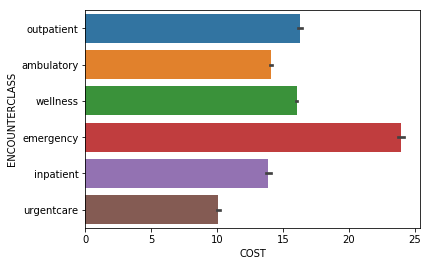

In [9]:
#4 Answer
import seaborn as sns
dev = sns.barplot(y="ENCOUNTERCLASS", x="COST", data=encounters_ny)
pic =dev.get_figure()


# Create this graph. 

ENCOUNTERCLASS is on they axis and  and COST on X axis.

![Imgur](https://i.imgur.com/asCDZSM.png)


# High Cost Patients Classification 

A second Challenge is determinine the most expensive individuals.  This is set as all those groups that are more than 1 standard deviation above the mean, indicated as 'HIGHCOST' in the dataset.  

(5. 5 points) 
Overall, count the total number of individuals who are high cost in NY (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ny`. 

Overall, count the total number of individuals who are high cost in MA (i.e., where encounters_ny['HIGHCOST'] is equal to 1.) Assign to the value `total_high_cost_ma`. 




In [10]:
#5 Answer 
total_high_cost_ny=encounters_ny['HIGHCOST'].sum()
total_high_cost_ma=encounters_ma['HIGHCOST'].sum()

print(total_high_cost_ny, total_high_cost_ma)

21558 22505


### Split the Train and test set for Classification with you DV set to HIGHCOST for NY Only. 


(6. 5 points) First split your data into an 70% train and 30% validation. Make sure that the results are *stratified* (equal classes in train and test) with `random_state = 111`.  

Also set the following:

```
splittest3 = y_train.iloc[5]
splittest4 = y_test.iloc[3]
```


In [11]:
#6 Answer 
#Set y equal to train encounters_ny['HIGHCOST'] 
y = encounters_ny['HIGHCOST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111,stratify=y)

#This will be used for testing. 
splittest3 = y_train.iloc[3]
splittest4 = y_test.iloc[17]
print (splittest3, splittest4)

1 1


### Classification with Random Forrest
(8. 5 points) Use a RandomForestClassifier to predict the 'HIGH_COST' with use the `CODE` and `ENCOUNTERCLASS` as independent variables.  

Also set the following:

```
train_accuracy
test_accuracy
```

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
#This fits the model object to the data.
classifier.fit(X_train,  y_train)
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score( X_test,  y_test)
#This creates the prediction. 
print("Classifier Accuracy for Train: ", train_accuracy )
print("Classifier Accuracy for Test: ", test_accuracy )

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifier Accuracy for Train:  0.8849033319621555
Classifier Accuracy for Test:  0.8817826977220373


### Submission
For the final submission, please submit a link to this notebook.



In [13]:
#This just gets the data and preps the environment. 
tests="https://github.com/jkuruzovich/final-starter-2019/raw/master/tests.zip"
ok="https://github.com/jkuruzovich/final-starter-2019/blob/master/final.ok"
!wget $tests && unzip -o tests.zip && wget $ok

--2019-06-25 15:54:52--  https://github.com/jkuruzovich/final-starter-2019/raw/master/tests.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/tests.zip [following]
--2019-06-25 15:54:52--  https://raw.githubusercontent.com/jkuruzovich/final-starter-2019/master/tests.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.184.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.184.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4414 (4.3K) [application/zip]
Saving to: ‘tests.zip’

tests.zip           100%[===================>]   4.31K  --.-KB/s    in 0s      

2019-06-25 15:54:52 (21.9 MB/s) - ‘tests.zip’ saved [4414/4414]

Archive:  tests.zip
  inflating: tests/q06a.py           
  inflating: tests/q

In [14]:
!pip uninstall okgrade -y && pip install git+https://github.com/data-8/Gofer-Grader  


  Cloning https://github.com/data-8/Gofer-Grader to /private/var/folders/nn/mq6lmp0j4gs24h69lmwgd7_h0000gn/T/pip-req-build-l3u_09du
  Running command git clone -q https://github.com/data-8/Gofer-Grader /private/var/folders/nn/mq6lmp0j4gs24h69lmwgd7_h0000gn/T/pip-req-build-l3u_09du
  Stored in directory: /private/var/folders/nn/mq6lmp0j4gs24h69lmwgd7_h0000gn/T/pip-ephem-wheel-cache-g3ceiyf8/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader


In [16]:
from client.api.notebook import Notebook
import grade
import importlib
importlib.reload(grade)
ok = Notebook('final.ok')
_ = ok.auth(inline=True)

name="final"
points_per_test=2.5
comments=""

grade.grade(name, points_per_test, comments, ok)

,student,q06a,q06a-failed,q11,q11-failed,q07a,q07a-failed,q05a,q05a-failed,q31,...,q02b,q02b-failed,q06b,q06b-failed,q07b,q07b-failed,q05b,q05b-failed,total_grade,comments
0,final,0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,...,0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,"['Exception raised:', ' Traceback (most rec...",0.0,


In [17]:
%%capture  
#This capture command supresses output. 

#***********
#Add the manually graded ones
q4=5
comments=""
points_per_test=2.5

#***********


from client.api.notebook import Notebook
ok = Notebook('final.ok')
_ = ok.auth(inline=False)
from bs4 import BeautifulSoup
import pandas as pd
import os

#Grade Results
results= {q[:-3]:ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')}

#If running locally with lots of notebooks load the grades. 
df = pd.DataFrame()
row=df.shape[0]
df.loc[row,'student']=name  #This is set in the last.
df.loc[row,'rcsid']=rcsid   #This is set in the last. 
total_grade=0
#This loops through the results
for key, val in results.items(): 
    df.loc[row,key]=val.grade
    results_key=str(key)+"-failed"
    df.loc[row,key]=val.grade*points_per_test
    #We use beautiful soup to parse the tests. 
    soup = BeautifulSoup(str(val.failed_tests), "lxml")
    #There are multiple components, but the expected data seems most valuable. 
    got = soup.get_text().split('\\n')[16:20]
    df.loc[row,results_key]=str(got)
    total_grade+=df.loc[row,key]  #total grade
df.loc[row, 'q4']=q4
total_grade+=q4
df.loc[row,'total_grade']=total_grade
df.loc[row,'comments']=comments

if not os.path.isfile('grades.csv'):
   df.to_csv('grades.csv', index=False)
else: # else it exists so append without writing the header
   df.to_csv('grades.csv', mode='a', header=False,index=False)



In [18]:
!cat grades

cat: grades: No such file or directory


In [19]:
cols=df.columns
row=df.shape[0]-1
for x in range(df.shape[1]):
  print(cols[x]," = ",  df.iloc[row,x])
  

student  =  final
rcsid  =  rcsid
q06a  =  2.5
q06a-failed  =  []
q11  =  0.0
q11-failed  =  ['Exception raised:', '    Traceback (most recent call last):', '      File "/anaconda3/lib/python3.7/doctest.py", line 1329, in __run', '        compileflags, 1), test.globs)']
q07a  =  2.5
q07a-failed  =  []
q05a  =  2.5
q05a-failed  =  []
q31  =  0.0
q31-failed  =  ['Exception raised:', '    Traceback (most recent call last):', '      File "/anaconda3/lib/python3.7/doctest.py", line 1329, in __run', '        compileflags, 1), test.globs)']
q211  =  0.0
q211-failed  =  ['Expecting:', "    \\'repeekkoob\\'", '**********************************************************************', 'Line 8, in /Users/guoshumao/Downloads/19 Summer/summer_2019/summer_2019/tests/q211.py 0']
q21  =  0.0
q21-failed  =  ['Failed example:', '    woman_asking', 'Exception raised:', '    Traceback (most recent call last):']
q01a  =  2.5
q01a-failed  =  []
q03a  =  2.5
q03a-failed  =  []
q02a  =  2.5
q02a-failed  =  []
q

In [20]:
#See All Records
df= pd.read_csv('grades.csv')
df

ParserError: Error tokenizing data. C error: Expected 35 fields in line 3, saw 37
